In [1]:
import math
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import numpy.ma as ma
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.crs as crs
import cartopy.feature as cfeature
import h5py  
from astropy.time import Time
import os
import glob
from osgeo import gdal
import scipy.ndimage
import rasterio as rio
import re
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em
from pyhdf.SD import SD, SDC
import pprint
import matplotlib.colors as colors 
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import csv
import pprint
import matplotlib.colors as colors 
from mpl_toolkits.axes_grid1 import make_axes_locatable 

In [2]:
# Set input directory, and change working directory - plug in D:
inDir = "D:\\masters_data\\ATL08"   # I should change this so I can work from github?
os.chdir(inDir)                                                               # Change to working directory
outDir = os.path.normpath(os.path.split(inDir)[0] + os.sep + 'output') + '\\' # Create and set output directory
if not os.path.exists(outDir): os.makedirs(outDir)

In [3]:
# select first MODIS file
ATL08Files = glob.glob('*ATL08*')
# print(len(ATL08Files))

In [4]:
# constants for conversion lat lon -> tile H,V and r,c
R = 6371007.181	    # the radius of the idealizes sphere representing the Earth
T = 1111950	        # the height and width of each MODIS tile in the projection plane
Xmin = -20015109    # the western limit of the projection plane
Ymax = 10007555	    # the northern limit of the projection plane
w = T/2400.0	    # the actual size of a '500m' MODIS sinusoidal grid cell. (would be /1200 for a 1km grid)

In [5]:
canopy_height_array = np.zeros((2400,2400))
# canopy_height_array[canopy_height_array ==0] = np.nan
Filenumber = 0
ATL08 = h5py.File(ATL08Files[Filenumber], 'r')
ATL08_latitude = ATL08['/gt2l/land_segments/latitude'] [:]
ATL08_longitude = ATL08['/gt2l/land_segments/longitude'][:]
ATL08_mean_canopy = ATL08['/gt2l/land_segments/canopy/h_mean_canopy'][:]


for file in ATL08Files:
    number = 0
    r_list = []
    c_list = []

    for i in ATL08_latitude:
        lat = ATL08_latitude[number]
        lon = ATL08_longitude[number]
        phi = lat/(180/math.pi) # convert to radians
        lamb = lon/(180/math.pi)
        x = R*lamb*math.cos(phi)
        y = R*phi
        r = int(math.floor(((Ymax-y)%T)/w-0.5))
        c = int(math.floor(((x-Xmin)%T)/w-0.5))

        r_list.append(r)
        c_list.append(c)
        number += 1
        
    for ii in range(len(ATL08_mean_canopy)):
        row = r_list[ii]
        col = c_list[ii]
        canopy_h = ATL08_mean_canopy[ii]
        canopy_height_array[row, col] = canopy_h
    
    Filenumber += 1

In [6]:
np.savetxt("D:\\masters_data\\output\\csv\\total_canopy_height_array_(meancanopyfile).csv", canopy_height_array, delimiter=",")

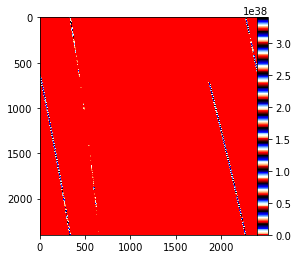

In [17]:
# ignore - for some reason need this to run to make the next one work - sign of poor script!
u = np.unique(canopy_height_array) 
bounds = np.concatenate(([canopy_height_array.min()], 
                         u[:-1]+np.diff(u)/2., 
                         [canopy_height_array.max()]))
    
fig, axes = plt.subplots() 
img = axes.imshow(canopy_height_array, cmap = "flag") 
divider = make_axes_locatable(axes) 
cax = divider.append_axes("right", size ="5 %") 
  
color_bar = plt.colorbar(img, cax = cax) 

plt.show()

NOTES for bpok (12/01/21): Not very much data in csv output file - is code working / do I have enough ATL08 data. If i just dowloaded a year I should rly keep downloading. 

Also - if i get a lot of data I need to check no areas have two overlapping lines - would then have the wrong data